In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [52]:
df = pd.read_csv("Toddler Autism dataset July 2018.csv")

In [53]:
df.drop(columns=['Case_No'], inplace=True, errors='ignore')

In [54]:
df = df.apply(pd.to_numeric, errors='coerce')


In [55]:
print(df.isnull().sum())  # Check for NaN values in each column
df.fillna(0, inplace=True)  # Optionally fill NaNs with a default value


A1                           0
A2                           0
A3                           0
A4                           0
A5                           0
A6                           0
A7                           0
A8                           0
A9                           0
A10                          0
Age_Mons                     0
Qchat-10-Score               0
Sex                       1054
Ethnicity                 1054
Jaundice                  1054
Family_mem_with_ASD       1054
Who completed the test    1054
Class/ASD                 1054
dtype: int64


In [56]:
# Check all column names
print("Columns in DataFrame:", df.columns.tolist())

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Recheck columns after stripping
print("Columns after stripping whitespace:", df.columns.tolist())

# Check if 'Class/ASD Traits' exists
if 'Class/ASD Traits' in df.columns:
    # Proceed with your operations
    X = df.drop(columns='Class/ASD Traits')  # Features
    y = df['Class/ASD Traits']  # Target variable
else:
    print("Column 'Class/ASD Traits' does not exist.")

Columns in DataFrame: ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD']
Columns after stripping whitespace: ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD']
Column 'Class/ASD Traits' does not exist.


In [57]:
print(df.dtypes)  # Check data types of all columns
print(df.head())  # View first few rows of the DataFrame


A1                          int64
A2                          int64
A3                          int64
A4                          int64
A5                          int64
A6                          int64
A7                          int64
A8                          int64
A9                          int64
A10                         int64
Age_Mons                    int64
Qchat-10-Score              int64
Sex                       float64
Ethnicity                 float64
Jaundice                  float64
Family_mem_with_ASD       float64
Who completed the test    float64
Class/ASD                 float64
dtype: object
   A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Qchat-10-Score  Sex  \
0   0   0   0   0   0   0   1   1   0    1        28               3  0.0   
1   1   1   0   0   0   1   1   0   0    0        36               4  0.0   
2   1   0   0   0   0   0   1   1   0    1        36               4  0.0   
3   1   1   1   1   1   1   1   1   1    1        24              

In [58]:
# Handling categorical variables
label_encoders = {}
categorical_cols = ['Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD','Who completed the test']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Encoding Yes/No answers (A1-A10)
for col in ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Define features and target variable
X = df.drop(columns='Class/ASD')  # Features
y = df['Class/ASD']  # Target variable

# Standardizing numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [59]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [60]:
# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [61]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [62]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(f'ROC-AUC Score: {roc_auc:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 1.00
ROC-AUC Score: nan
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       211

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


In [63]:
# Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             verbose=2)

In [64]:
# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 1.0


In [66]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.9 MB/s eta 0:00:00


In [67]:
import streamlit as st


2025-01-31 19:55:41.834 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-31 19:55:42.140 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-01-31 19:55:42.143 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-31 19:55:42.147 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-31 19:55:42.150 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-31 19:55:42.567 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-31 19:55:43.683 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-31 19:55:43.687 Thread 'MainThread': mi

DeltaGenerator()

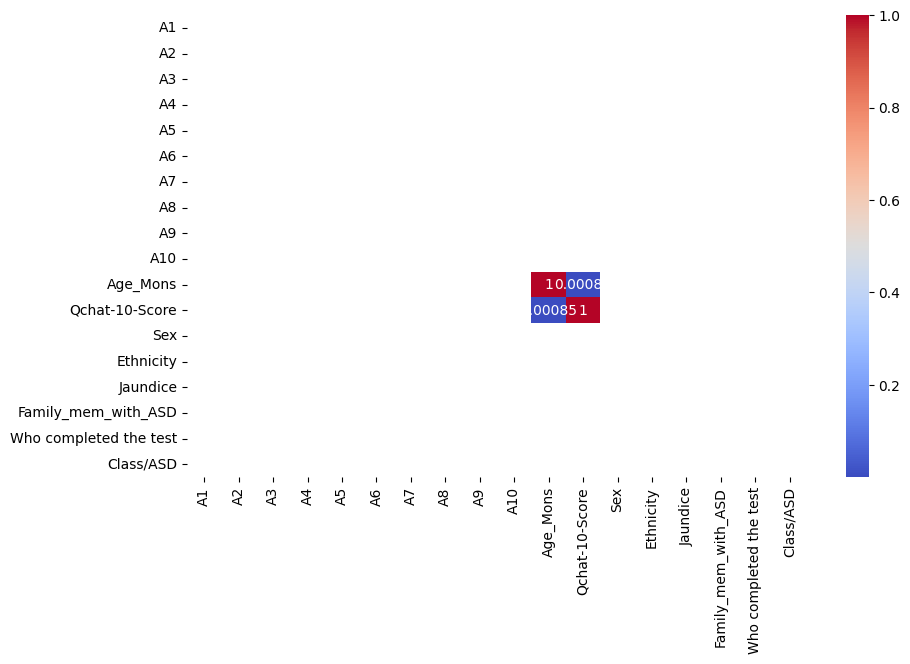

In [68]:
# Data Visualization
st.title("ASD Prediction - Data Analysis")
st.subheader("Feature Correlation Heatmap")
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', ax=ax)
st.pyplot(fig)

In [69]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
st.subheader("Model Evaluation")
st.write(f'Accuracy: {accuracy:.2f}')
st.write(f'ROC-AUC Score: {roc_auc:.2f}')
st.text(classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
2025-01-31 19:56:09.499 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-31 19:56:09.506 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-31 19:56:09.510 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-31 19:56:09.512 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-31 19:56:09.514 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-31 19:56:09.518 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-31 19:56:09.523 Thread 'MainThread': missi

DeltaGenerator()

In [70]:
# Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and score
st.subheader("Hyperparameter Tuning Results")
st.write("Best Parameters:", grid_search.best_params_)
st.write("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


2025-01-31 19:58:29.692 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-31 19:58:29.693 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-31 19:58:29.700 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-31 19:58:29.702 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-31 19:58:29.706 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-31 19:58:29.707 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-31 19:58:29.710 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-31 19:58:29.712 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [71]:
# Streamlit user input form
st.title("ASD Prediction Application")
user_input = {}
for col in X.columns:
    user_input[col] = st.number_input(f"Enter value for {col}", value=float(X[col].mean()))

if st.button("Predict ASD Probability"):
    user_data = np.array([list(user_input.values())]).reshape(1, -1)
    user_data_scaled = scaler.transform(user_data)
    prediction = rf_model.predict(user_data_scaled)
    st.write("Predicted ASD Classification:", "Yes" if prediction[0] == 1 else "No")

2025-01-31 19:58:42.115 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-31 19:58:42.117 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-31 19:58:42.121 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-31 19:58:42.123 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-31 19:58:42.127 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-31 19:58:42.130 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-31 19:58:42.131 Session state does not function when running a script without `streamlit run`
2025-01-31 19:58:42.133 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-31 19:58